


<h1 style='text-align: center;'>Bike Sharing Demand Prediction </h1>
                                        

### Introduction: 
<p style='text-align: justify;'>This notebook contains a solution for the assignment of building a multiple linear regression model to predict the demand for shared bikes. The assignment is based on a dataset provided by BoomBikes, a US bike-sharing provider, which aims to understand the factors affecting the demand for shared bikes in the American market.</p> 

### Problem Statement:  
<div align="justify">A US bike-sharing provider, BoomBikes company has faced revenue challenges during the COVID-19 pandemic and the company is finding it very difficult to sustain in the current market scenario. The company aims to develop a robust business plan to boost revenues and economy restores to a healthy state. The goal is to understand the factors influencing the demand for shared bikes in the American market, identifying significant variables, and creating a predictive model for management decision-making.

Specifically, the company wants to know:<br>
- Which variables are significant in predicting the demand for shared bikes.<br>
- How well those variables describe the bike demands.</div>

### Objectives:  
<div align="justify">The main objective of this assignment is to create a model using a provided dataset, identifying significant variables to predict shared bike demand. The model will help BoomBikes to understand how demand varies with different features, allowing them to adjust their business strategy to meet customer expectations and capitalize on market dynamics.</div>

### Analysis Approach:  
<div align="justify">To tackle this problem effectively, I have established a structured data analysis approach.<br>

- Data Preprocessing:<br> It includes understanding, cleaning, and preparing the data for analysis, handling missing values, encoding categorical variables, dropping unnecessary columns, and standardizing data.

- Exploratory Data Analysis (EDA):<br>Exploring the dataset to identify patterns, trends, and relationships in the dataset. This will involve univariate, bivariate, and multivariate analysis.

- Visualizations:<br>It includes creating visual representations of the data to facilitate a better understanding of the insights, trends, and relationships.

- Feature Importance:<br>Identifying key variables that strongly influence target variables using statistical methods such as Exploratory Data Analysis (EDA).

- Model Building:<br>It includes splitting the data into training and testing sets, performing scaling, partition the data into features (X) and the target variable (Y) and performing linear regression analysis on the dataset.

- Model Evaluation:<br>It includes evaluating and validating the different assumptions, examining the R-squared and adjusted R-squared values.</div>

### Python Code for Analyis:

### Utilizing a python libraries for comprehensive analysis:

In [1]:
# Importing the essential python libraries for comprehensive analysis:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
import plotly.express as px

# Employing the scikit-learn library for regression learning tasks:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Importing the statsmodels library for statistical analysis:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Addressing warnings by suppressing them:
import warnings
warnings.filterwarnings('ignore')

### Data Loading and Understanding:

### Data Loading:

In [2]:
# Loading data from a CSV file into a DataFrame:
df = pd.read_csv(r"day.csv")

# Printing the shape of the data:
print("Data shape:", df.shape)

Data shape: (730, 16)


In [3]:
# Displaying the first few rows of the DataFrame:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Understanding:

In [4]:
# Displaying basic information about the DataFrame:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [5]:
# Summarizing the statistical details of the DataFrame columns:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Printing the column index of the DataFrame:
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [7]:
# Printing the data types of DataFrame columns:
print(df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


#### Observations on the Dataset:
- #### The dataset comprises 730 rows and 16 columns.

- #### With the exception of one column, all others are of either float or integer type.


### Data Quality Check, Cleaning, and Manipulation:

In [8]:
## printing the number of total rows and columns
print('Total Number of Columns:',df.shape[1])
print('Total Number of Rows:',df.shape[0])
## Number of missing values
print('Total Number of Missing Values:',df.isnull().sum().sum())
## Number of duplicates
print('Total Number of Duplicates:',df.duplicated().sum())
## Number of unique values
print('Total Number of Unique Values:',df.nunique().sum())

Total Number of Columns: 16
Total Number of Rows: 730
Total Number of Missing Values: 0
Total Number of Duplicates: 0
Total Number of Unique Values: 5900


#### Observations: The dataset is complete, with no instances of missing or null values found in either columns or rows and No duplicate values were found in the dataset.

### Renaming some Columns for better Readability:

In [9]:
# Renaming some columns for better readability:
df.rename(columns={'yr': 'year', 'mnth': 'month', 'hum': 'humidity'}, inplace=True)

# Displaying the first few rows of the updated dataset:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Printing the updated column index after renaming:
print(df.columns)

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [11]:
# Creating a copy of the DataFrame:
df_copy = df.copy()

# Dropping duplicates in the copied DataFrame:
df_copy.drop_duplicates(inplace=True)

# Checking the shape of the copied DataFrame after dropping duplicates:
print(df_copy.shape)


(730, 16)


#### Observations: The shape same after dropping duplicate it means there are no duplicates.

#### Removing Unnecessary Columns:
- #### instant: It is only an index
- #### dteday: It has date, we already seperated columns as "year" and "month"
- #### casual and registered: Both these columns contains the count of bike booked by different categories of customers, It is sum of different categories values

In [12]:
# Removing Unnecessary Columns:
df=df.drop(['instant','dteday','casual','registered'],axis=1)
# To display the shape of the dataframe after removing columns:
print("Data shape after removing columns:", df.shape)

Data shape after removing columns: (730, 12)


In [13]:
# Display information about the dataframe:
print("New Dataframe Information:")
print(df.info())

New Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB
None


### Checking for Outliers:

In [14]:
# Displaying the count of unique values in each column of the DataFrame:
df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

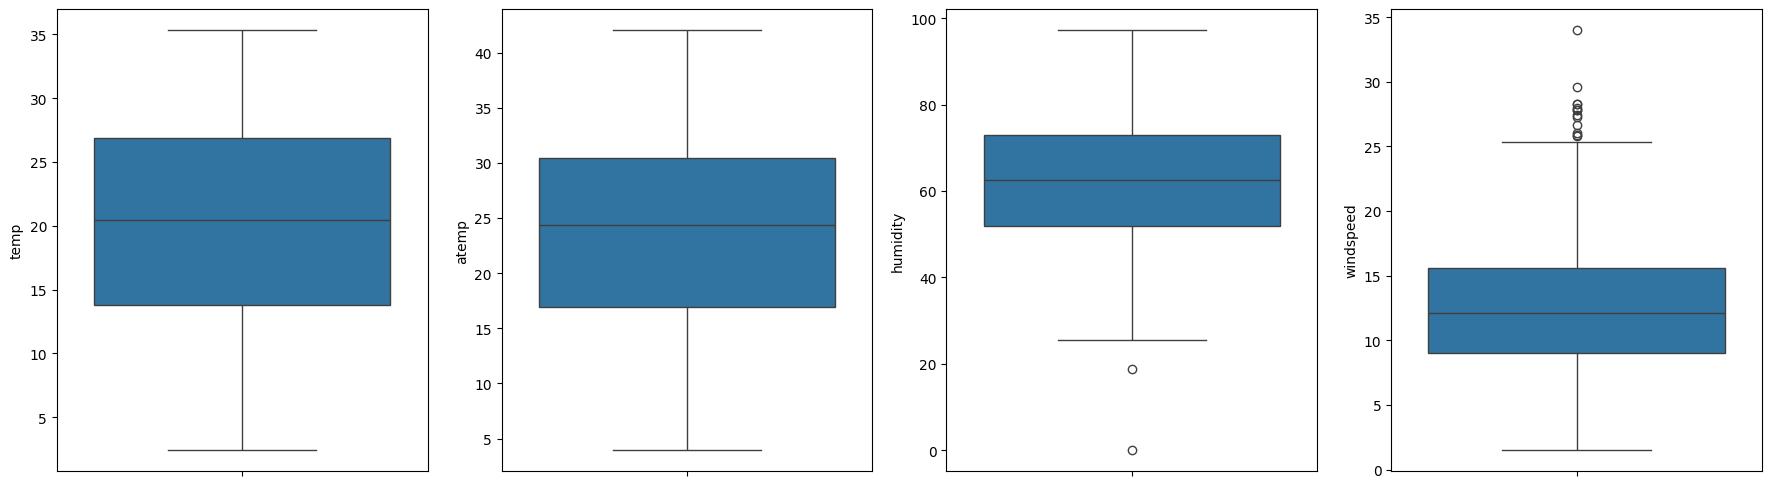

In [15]:
# Columns to be visualized using boxplots:
columns = ['temp', 'atemp', 'humidity', 'windspeed']

# Setting up the figure size:
plt.figure(figsize=(22, 6))

# Looping through each column and creating a boxplot:
for i, col in enumerate(columns, 1):
    plt.subplot(1, 4, i)
    # Generating a boxplot for the current column:
    sns.boxplot(y=col, data=df)

# Displaying the boxplots
plt.show()

#### Observations: It is clear that there is no any outliers.

### Encoding/Mapping the Categorical Columns:

In [16]:
# Mapping numeric values to corresponding season names in the 'season' column:
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
# Checking whether the conversion is done properly or not 
df['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [17]:
# Mapping numeric values to corresponding weekday names in the 'weekday' column:
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
# Checking whether the conversion is done properly or not:
df['weekday'].astype('category').value_counts()

weekday
mon    105
sat    105
sun    105
fri    104
thu    104
tue    104
wed    103
Name: count, dtype: int64

In [18]:
# Mapping numeric values to corresponding month names in the 'month' column:
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
# Checking whether the conversion is done properly or not:
df['month'].astype('category').value_counts()

month
aug     62
dec     62
jan     62
july    62
mar     62
may     62
oct     62
apr     60
june    60
nov     60
sep     60
feb     56
Name: count, dtype: int64

In [19]:
# Mapping numeric values to corresponding weathersit names in the 'weathersit' column:
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
# Checking whether the conversion is done properly or not:
df['weathersit'].astype('category').value_counts()

weathersit
Clear             463
Misty             246
Light_snowrain     21
Name: count, dtype: int64

In [20]:
# Checking the first few rows of the updated DataFrame:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
# Checking the column information of the DataFrame:
print("Data set Information:")
df.info()

Data set Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Visualization of Numeric Variables:

<Figure size 4000x2000 with 0 Axes>

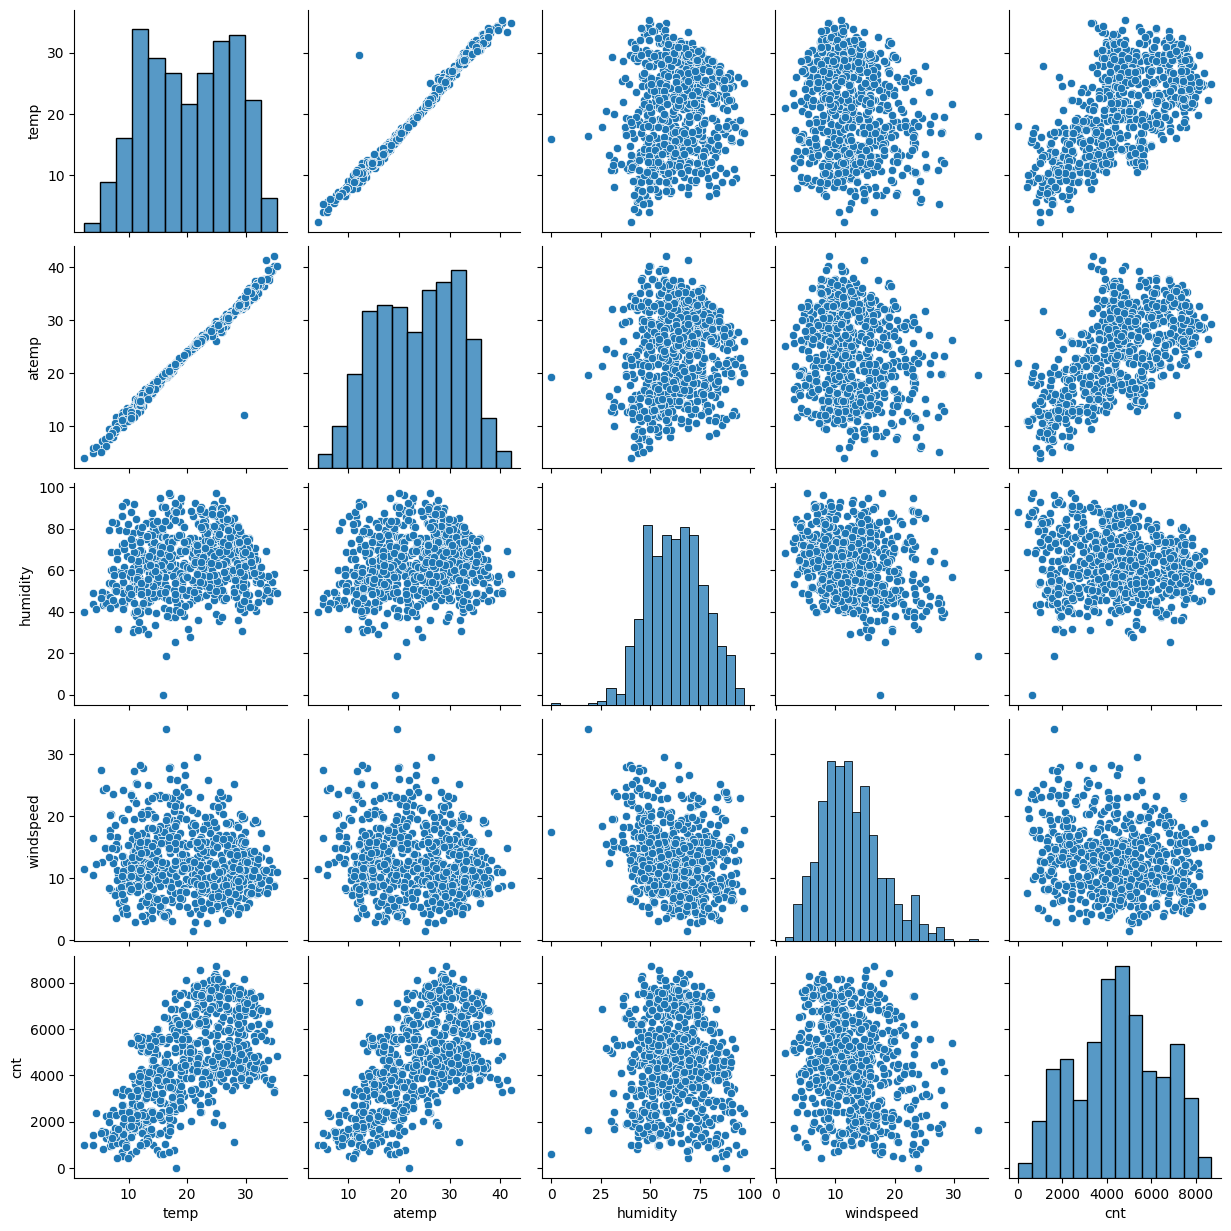

In [22]:
# To make a pairplot of all the numeric variables:
# Setting the figure size:
plt.figure(figsize=(40, 20))

# Creating a pairplot for selected numeric variables
sns.pairplot(data=df, vars=['temp', 'atemp', 'humidity', 'windspeed', 'cnt'])

# Displaying the pairplot:
plt.show()

#### Observations:
- #### The above Pair-Plot tells us temp and atemp has the highest corelation with the target variable cnt, there is a linear relationship between 'temp','atemp' and 'cnt'
- #### temp and atemp are highly co-related with each other

### Visualization of Categorical Variables:

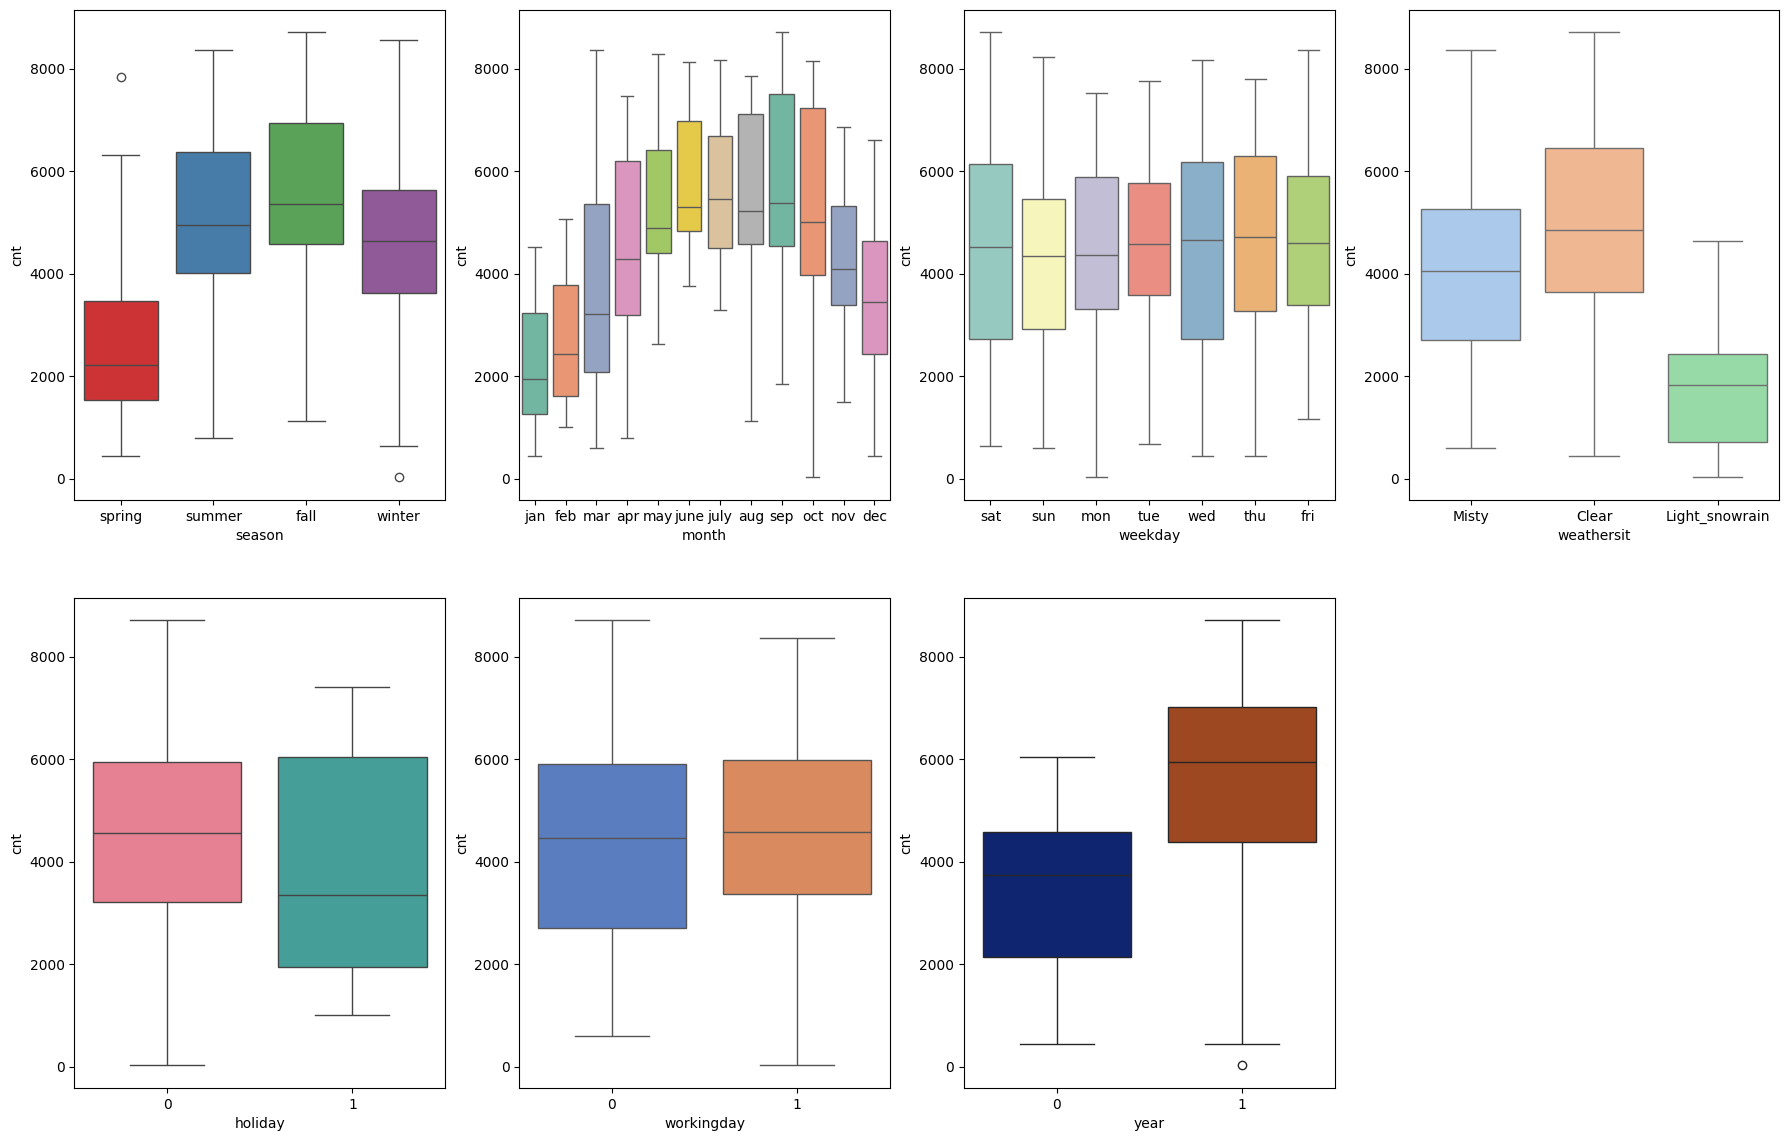

In [23]:
# To make a boxplots for categorical variables:
# Setting the figure size:
plt.figure(figsize=(22, 14))

# Creating subplots for each categorical variable against the target variable 'cnt':
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=df, palette='Set1')

plt.subplot(2, 4, 2)
sns.boxplot(x='month', y='cnt', data=df, palette='Set2')

plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=df, palette='Set3')

plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=df, palette='pastel')

plt.subplot(2, 4, 5)
sns.boxplot(x='holiday', y='cnt', data=df, palette='husl')

plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=df, palette='muted')

plt.subplot(2, 4, 7)
sns.boxplot(x='year', y='cnt', data=df, palette='dark')

# Displaying the plots
plt.show()


In [24]:
# Function to create barplots for a categorical column against the target variable 'cnt':
def plot_cat(column):
    # Setting the figure size:
    plt.figure(figsize=(12, 6))

    # Subplot 1: Barplot without considering 'year':
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=df)

    # Subplot 2: Barplot with 'year' as hue:
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=df, hue='year', palette='Set2')
    
    # Adding legend for the 'year' variable:
    plt.legend(labels=['2018', '2019'])

    # Displaying the barplots:
    plt.show()


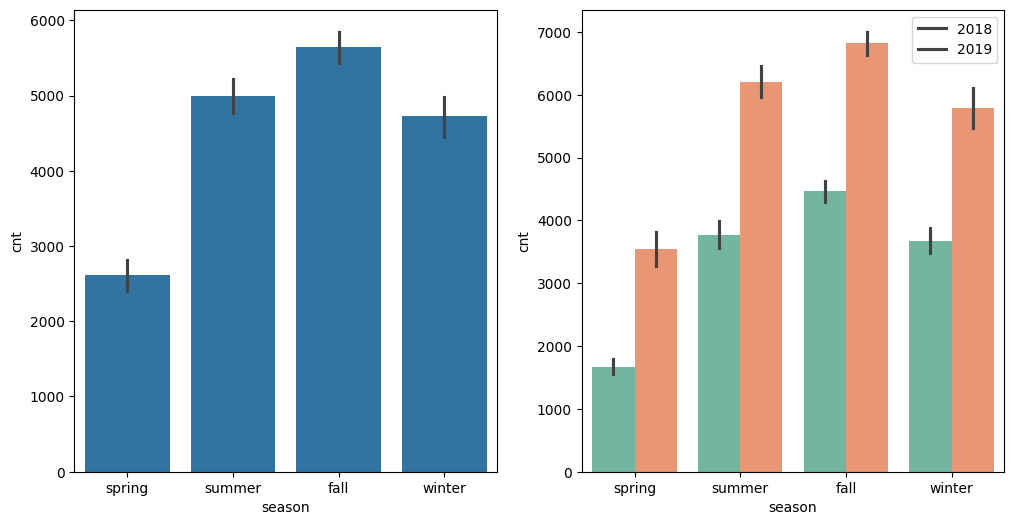

In [25]:
# Calling the function to create barplots for the 'season' column
plot_cat('season')

#### Observations: More people are booking during the fall season, and overall, the number of bookings has gone up a lot from 2018 to 2019 in every season.

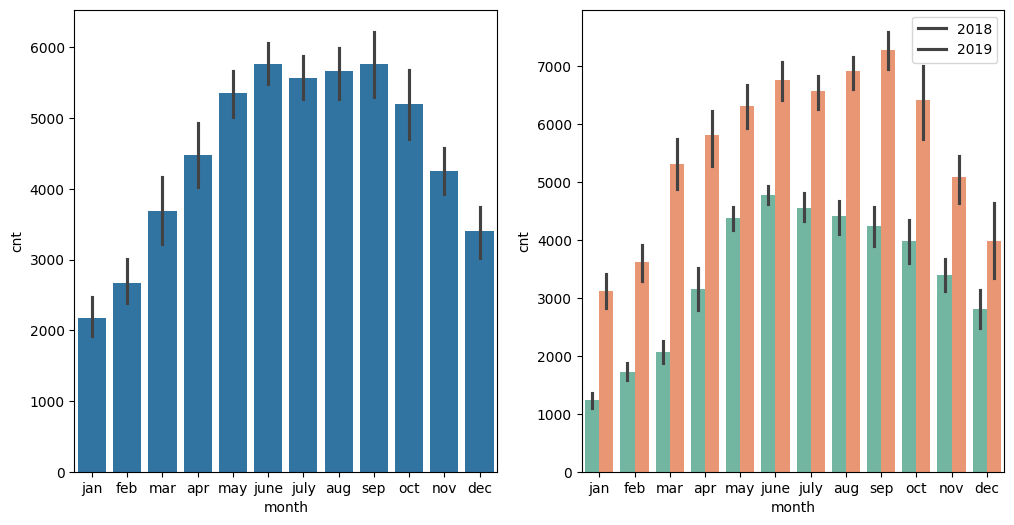

In [26]:
# plotting visualization for month column:
plot_cat('month')

#### Observations: The majority of bookings happened in May, June, July, August, September, and October. The trend shows an increase from the beginning to the middle of the year, then starts to decrease towards the end of the year. The number of bookings for each month appears to have gone up from 2018 to 2019.

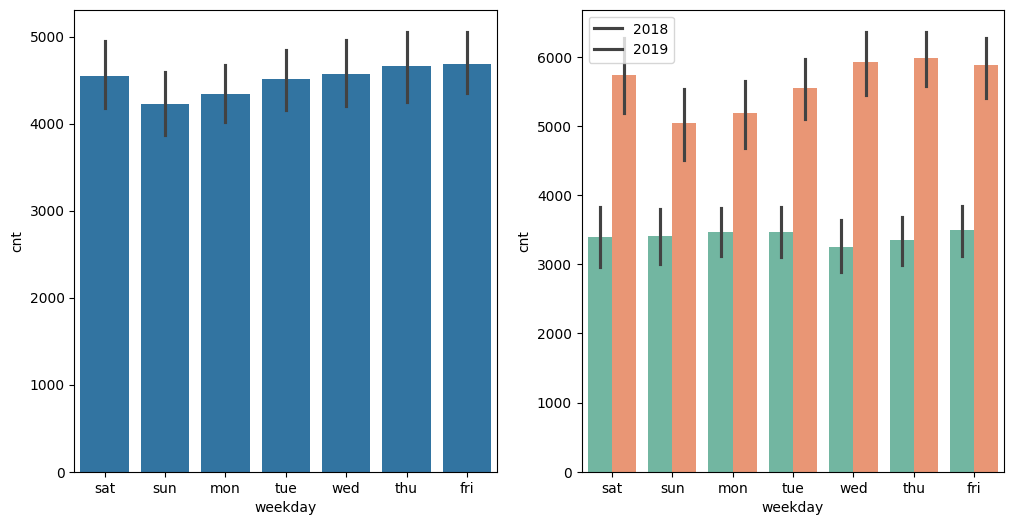

In [27]:
# Calling the function to create barplots for the 'weekday' column:
plot_cat('weekday')

#### Observations: Wednesday, Thursday, Friday, and Saturday have a higher number of bookings compared to the beginning of the week.

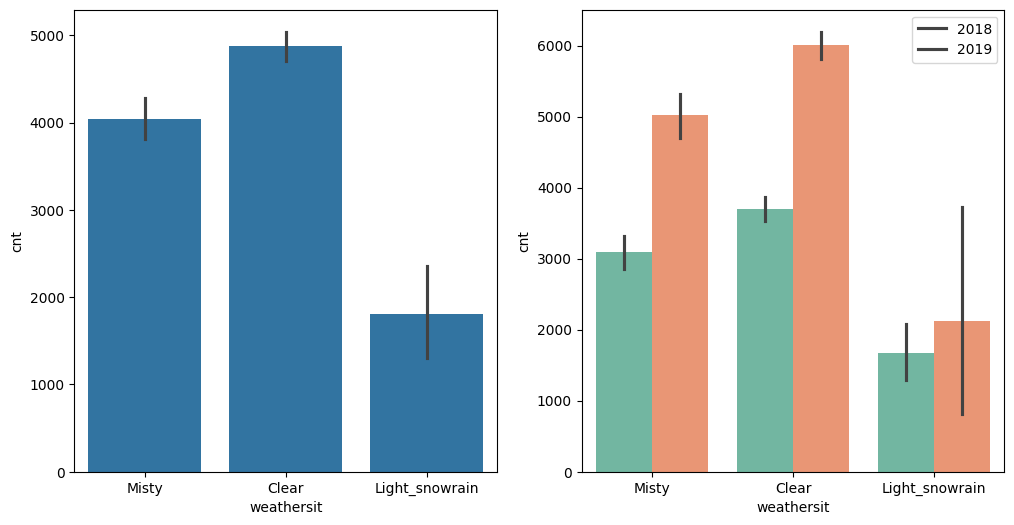

In [28]:
# Calling the function to create barplots for the 'weathersit' column:
plot_cat('weathersit')

#### Observations: Booking numbers increased notably during clear weather. Additionally, when comparing 2019 to the previous year 2018, there was an overall increase in bookings for every weather condition.

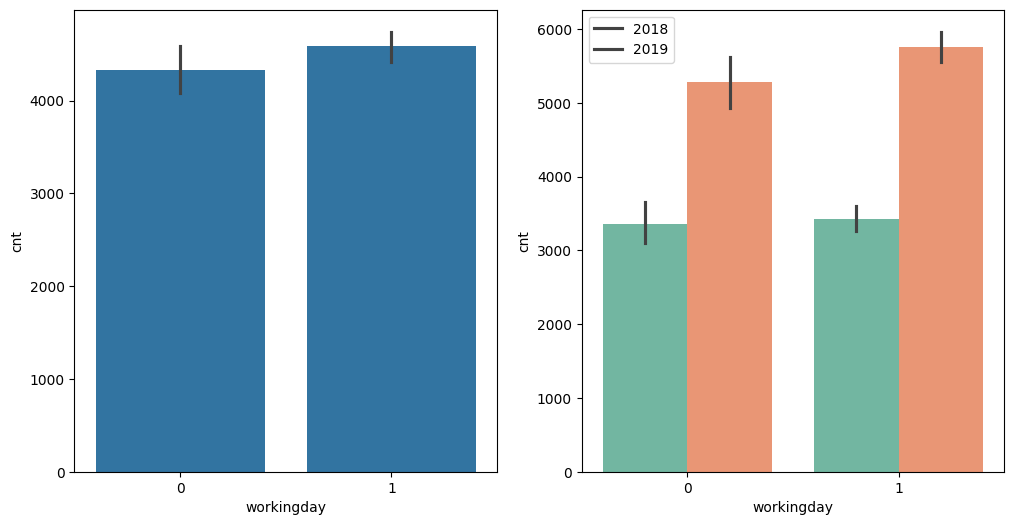

In [29]:
# Calling the function to create barplots for the 'workingday' column:
plot_cat('workingday')

#### Observations: The number of booking seems to be more on working days compared to non-working days. There is an increase in the count from 2018 to 2019.

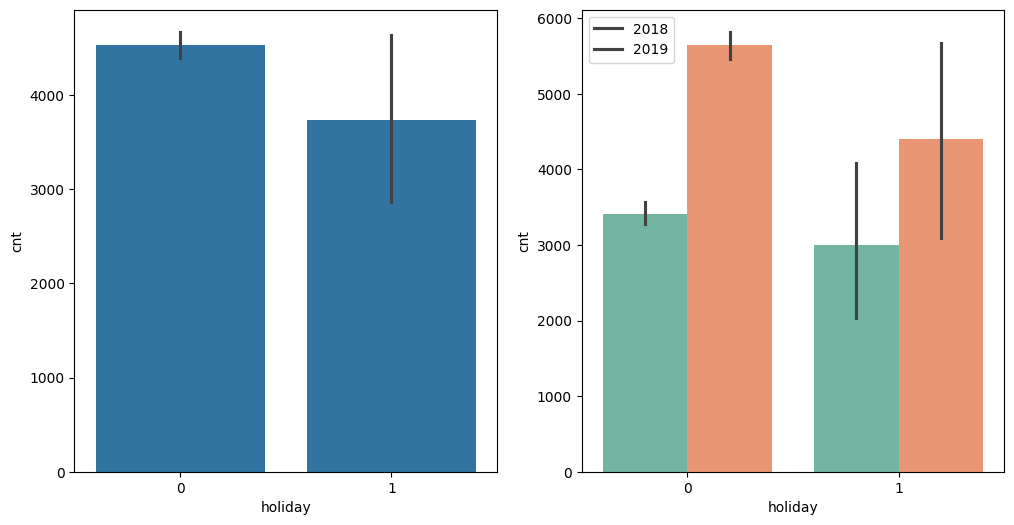

In [30]:
# Calling the function to create barplots for the 'holiday' column:
plot_cat('holiday')

#### Observations: Booking seems to be less in number, when its not holiday.

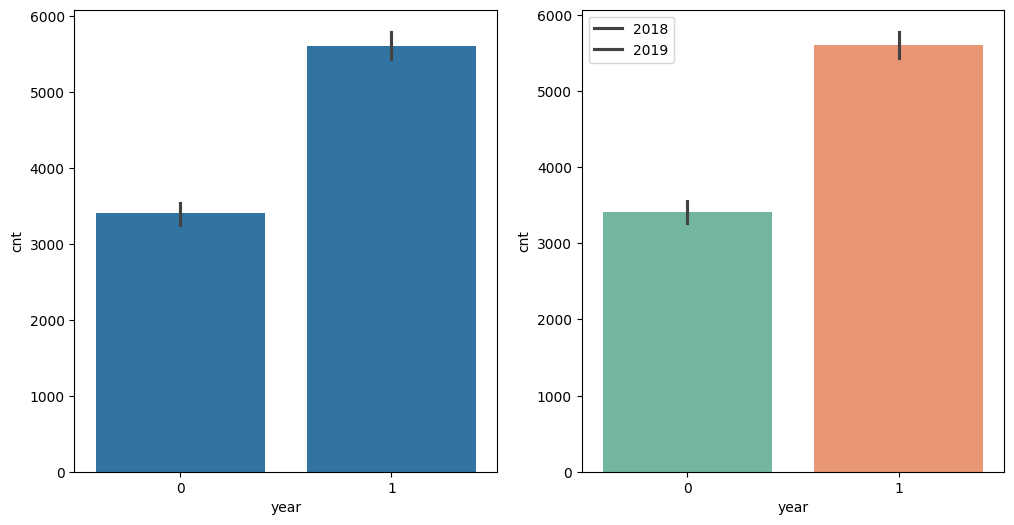

In [31]:
# Calling the function to create barplots for the 'year' column
plot_cat('year')

#### Observations: The increase in bookings from the previous year to 2019 reflects positive progress in terms of business.

### Correlation Analysis:

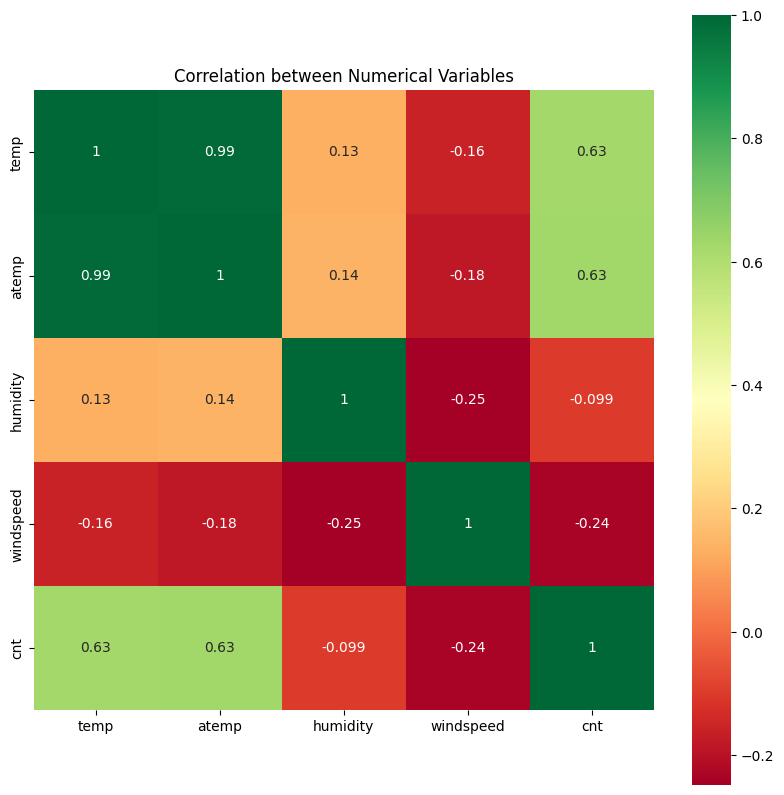

In [32]:
# Selecting numerical variables for correlation analysis:
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

# Calculating the correlation matrix:
correlation_matrix = df[numerical_columns].corr()

# Setting up the figure size:
plt.figure(figsize=(10, 10))

# Generating a heatmap to visualize correlations:
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", square=True)

# Adding a title to the plot:
plt.title("Correlation between Numerical Variables")

# Displaying the plot:
plt.show()

#### Observations: The linear relationship between temp and atemp suggests multicollinearity, so both parameters can't be used in the model simultaneously. To determine which parameters to retain, we'll assess Variance Inflation Factor (VIF) and p-values relative to other variables in the model.

### Data Preparation and Manupulation for Analysis:

#### Creating Dummy Variables for Categorical Columns:

In [33]:
# Creating dummy variables for 'month', 'weekday', 'weathersit', and 'season':
months_df = pd.get_dummies(df['month'], drop_first=True, prefix='month', dtype=int)
weekdays_df = pd.get_dummies(df['weekday'], drop_first=True, prefix='weekday', dtype=int)
weathersit_df = pd.get_dummies(df['weathersit'], drop_first=True, prefix='weathersit', dtype=int)
seasons_df = pd.get_dummies(df['season'], drop_first=True, prefix='season', dtype=int)

In [34]:
# Concatenating dummy variables with the original DataFrame
df_with_dummies = pd.concat([df, months_df, weekdays_df, weathersit_df, seasons_df], axis=1)

# Displaying the head of the updated DataFrame
df_with_dummies.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [35]:
# Displaying information about the updated DataFrame with dummy variables
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     730 non-null    object 
 1   year                       730 non-null    int64  
 2   month                      730 non-null    object 
 3   holiday                    730 non-null    int64  
 4   weekday                    730 non-null    object 
 5   workingday                 730 non-null    int64  
 6   weathersit                 730 non-null    object 
 7   temp                       730 non-null    float64
 8   atemp                      730 non-null    float64
 9   humidity                   730 non-null    float64
 10  windspeed                  730 non-null    float64
 11  cnt                        730 non-null    int64  
 12  month_aug                  730 non-null    int32  
 13  month_dec                  730 non-null    int32  

In [36]:
# Dropping unnecessary columns after creating dummy variables:
df_with_dummies.drop(['season', 'month', 'weekday', 'weathersit'], axis=1, inplace=True)

In [37]:
# Check the head of the new DataFrame
df_with_dummies.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [38]:
# Displaying the head of the new DataFrame:
print("Head of the New DataFrame:")
print(df_with_dummies.head())

Head of the New DataFrame:
   year  holiday  workingday       temp     atemp  humidity  windspeed   cnt  \
0     0        0           0  14.110847  18.18125   80.5833  10.749882   985   
1     0        0           0  14.902598  17.68695   69.6087  16.652113   801   
2     0        0           1   8.050924   9.47025   43.7273  16.636703  1349   
3     0        0           1   8.200000  10.60610   59.0435  10.739832  1562   
4     0        0           1   9.305237  11.46350   43.6957  12.522300  1600   

   month_aug  month_dec  ...  weekday_sat  weekday_sun  weekday_thu  \
0          0          0  ...            1            0            0   
1          0          0  ...            0            1            0   
2          0          0  ...            0            0            0   
3          0          0  ...            0            0            0   
4          0          0  ...            0            0            0   

   weekday_tue  weekday_wed  weathersit_Light_snowrain  weathersi

In [39]:
# Checking the shape of the new DataFrame:
print("\nShape of the New DataFrame:", df_with_dummies.shape)


Shape of the New DataFrame: (730, 30)


In [40]:
# Displaying column information for the new DataFrame:
print("Column Information for the New DataFrame:")
df_with_dummies.info()

Column Information for the New DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   humidity                   730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   month_aug                  730 non-null    int32  
 9   month_dec                  730 non-null    int32  
 10  month_feb                  730 non-null    int32  
 11  month_jan                  730 non-null    int32  
 12  month_july                 730 non-null    int32  
 13  month_ju

### Splitting the Data into Training and Testing Sets:

In [41]:
# Setting the random seed for reproducibility:
np.random.seed(0)

# Splitting the DataFrame into Train and Test:
df_train, df_test = train_test_split(df_with_dummies, train_size=0.7, random_state=100)

In [42]:
# Checking the shape of the training dataset:
print("Shape of the Training Dataset:", df_train.shape)

Shape of the Training Dataset: (510, 30)


In [43]:
# Checking the shape of the test dataset:
print("Shape of the Test Dataset:", df_test.shape)

Shape of the Test Dataset: (220, 30)


### Scaling:

In [44]:
# MinMaxScaler to rescale the features:
scaler = MinMaxScaler()

In [45]:
# Verifying the head of the dataset before scaling:
print("Head of the Training Dataset Before Scaling:")
print(df_train.head())

Head of the Training Dataset Before Scaling:
     year  holiday  workingday       temp    atemp  humidity  windspeed   cnt  \
576     1        0           1  29.246653  33.1448   70.4167  11.083475  7216   
426     1        0           0  16.980847  20.6746   62.1250  10.792293  4066   
728     1        0           0  10.489153  11.5850   48.3333  23.500518  1796   
482     1        0           0  15.443347  18.8752   48.9583   8.708325  4220   
111     0        0           1  13.803347  16.0977   72.9583  14.707907  1683   

     month_aug  month_dec  ...  weekday_sat  weekday_sun  weekday_thu  \
576          0          0  ...            0            0            0   
426          0          0  ...            1            0            0   
728          0          1  ...            0            1            0   
482          0          0  ...            1            0            0   
111          0          0  ...            0            0            0   

     weekday_tue  weekday_wed

In [46]:
# Applying MinMaxScaler to rescale selected numerical columns:
n_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']
df_train[n_vars] = scaler.fit_transform(df_train[n_vars])

In [47]:
# Verifying the head of the training dataset after applying scaling:
print("Head of the Training Dataset After Scaling:")
print(df_train.head())

Head of the Training Dataset After Scaling:
     year  holiday  workingday      temp     atemp  humidity  windspeed  \
576     1        0           1  0.815169  0.766351  0.725633   0.264686   
426     1        0           0  0.442393  0.438975  0.640189   0.255342   
728     1        0           0  0.245101  0.200348  0.498067   0.663106   
482     1        0           0  0.395666  0.391735  0.504508   0.188475   
111     0        0           1  0.345824  0.318819  0.751824   0.380981   

          cnt  month_aug  month_dec  ...  weekday_sat  weekday_sun  \
576  0.827658          0          0  ...            0            0   
426  0.465255          0          0  ...            1            0   
728  0.204096          0          1  ...            0            1   
482  0.482973          0          0  ...            1            0   
111  0.191095          0          0  ...            0            0   

     weekday_thu  weekday_tue  weekday_wed  weathersit_Light_snowrain  \
576        

In [48]:
# Describing the training dataset:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


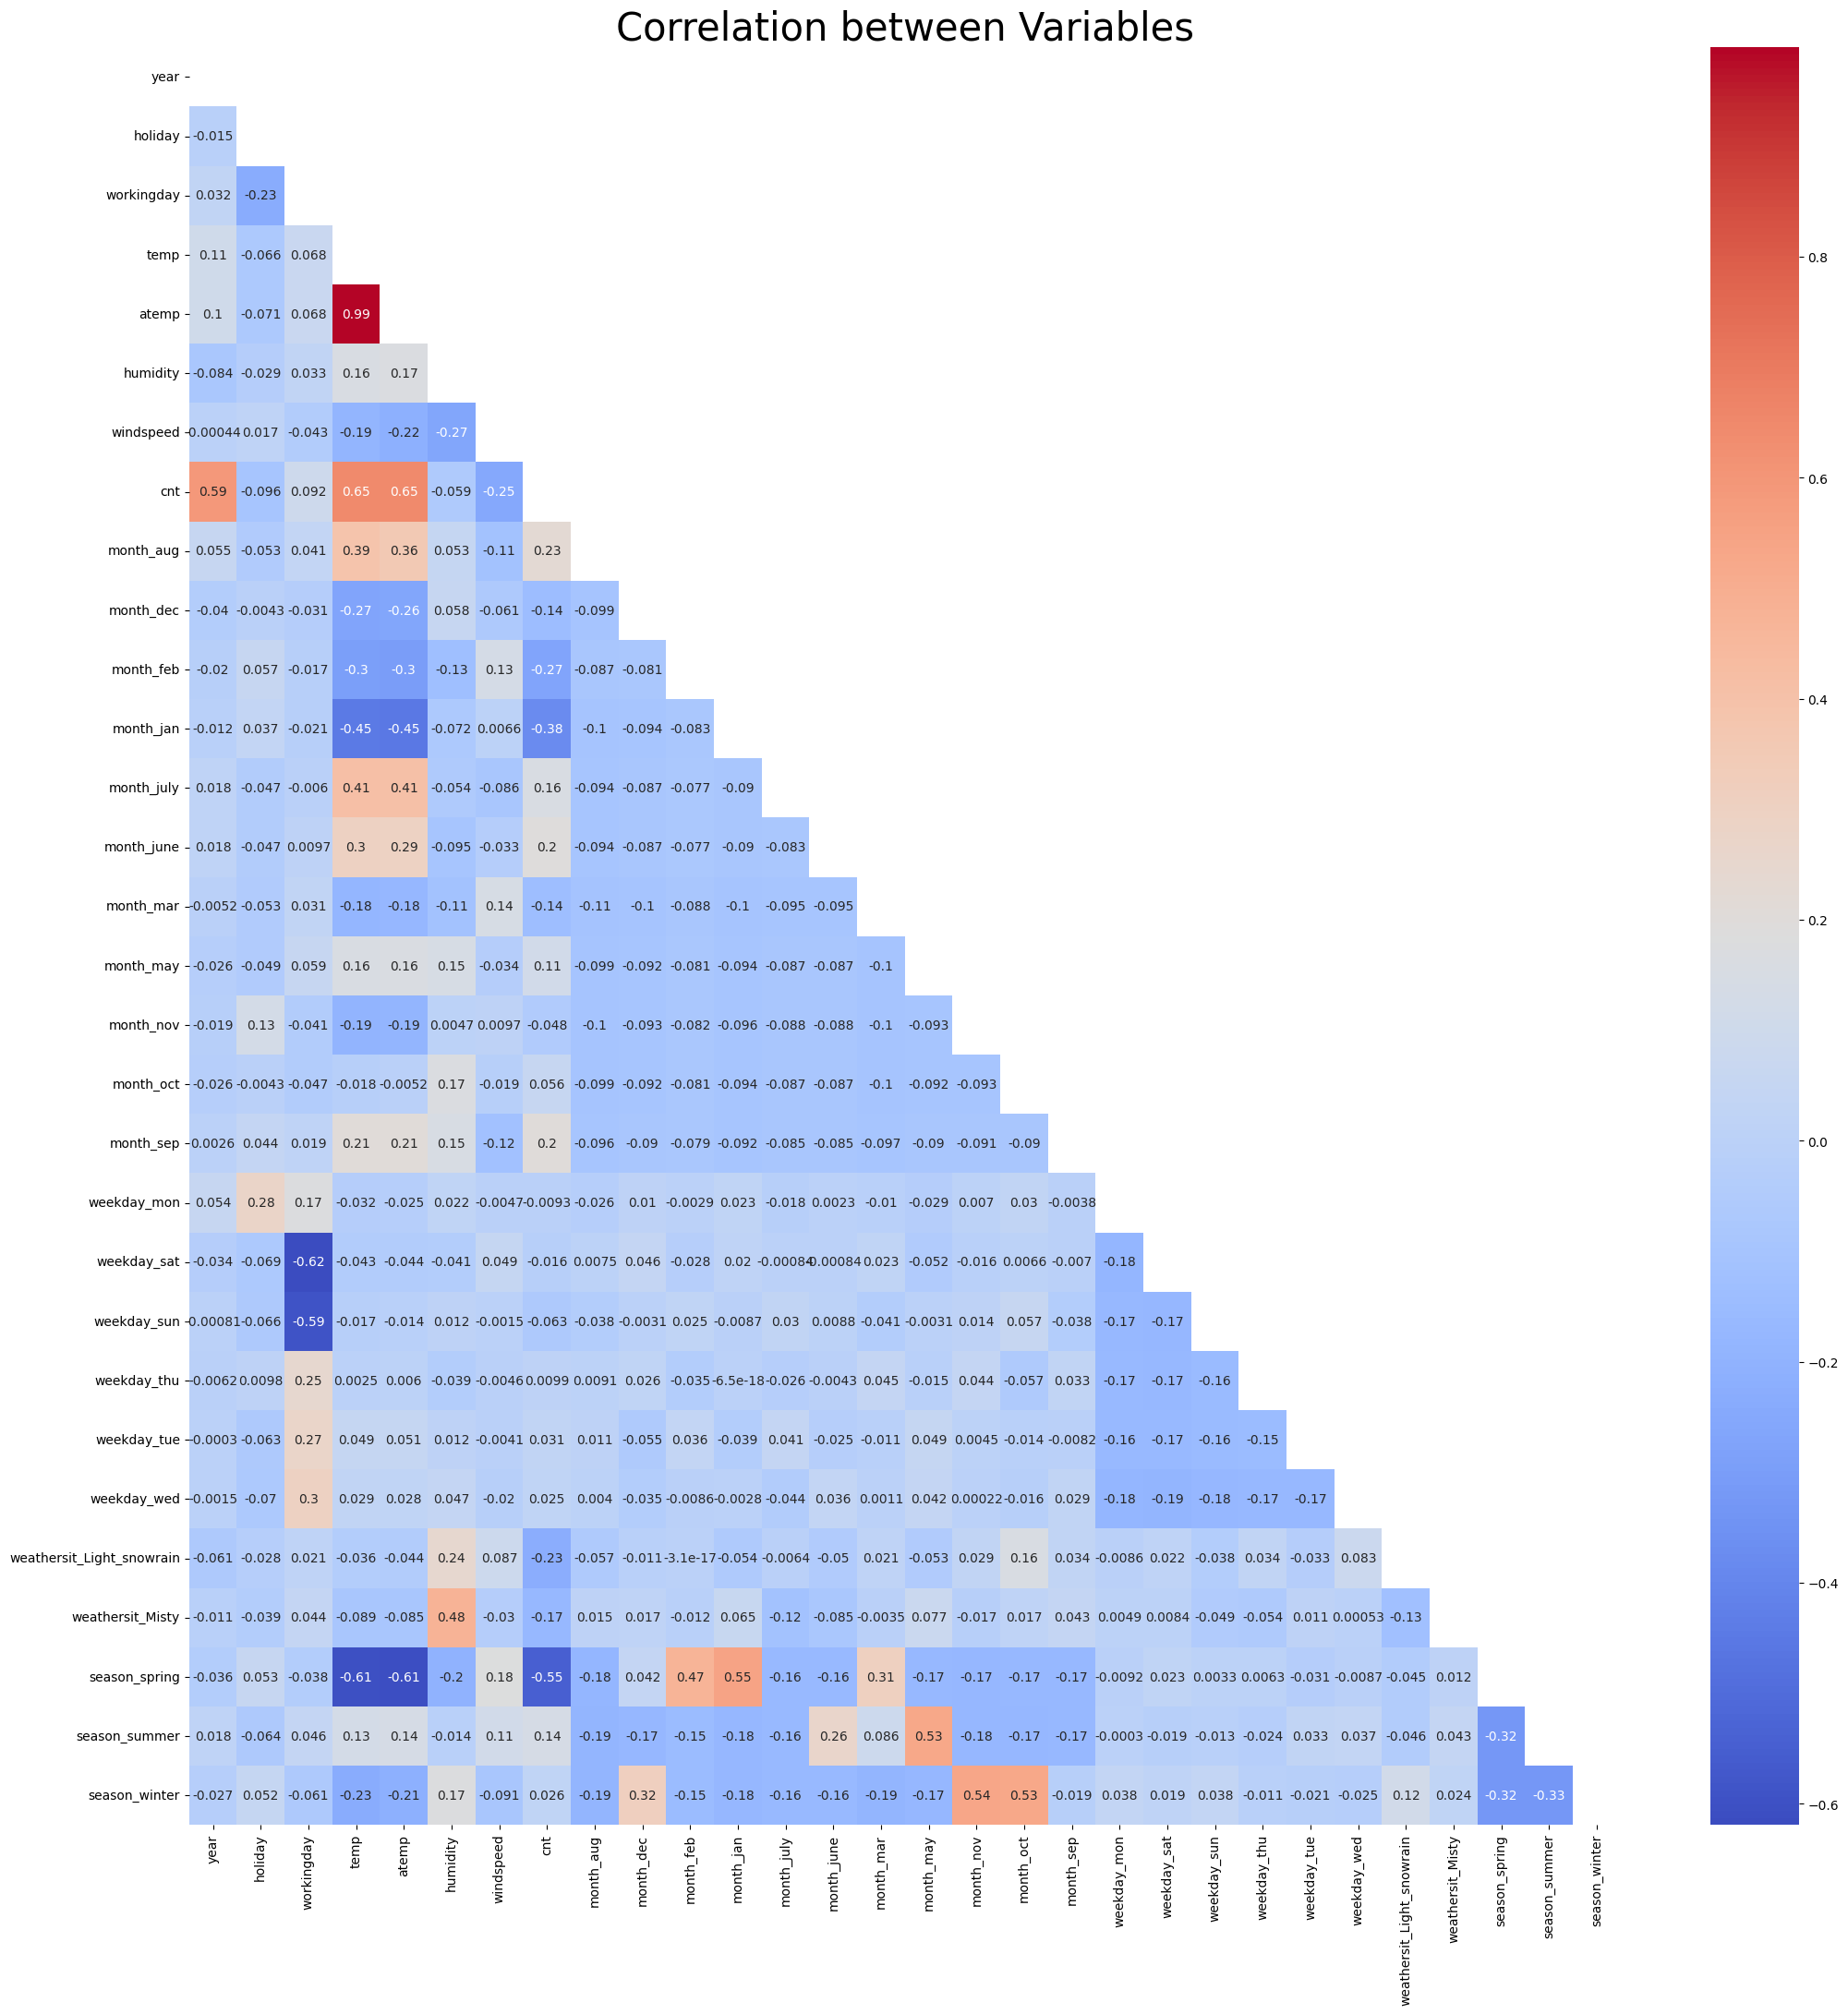

In [49]:
# Checking correlation coefficients with a heatmap:
# Setting up the figure size:
plt.figure(figsize=(25, 25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm", mask=matrix)
plt.title("Correlation between Variables", fontsize=30)
plt.show()

#### Observations: There is a correlation between 'cnt' and both the 'year' variable and temp. Likewise, there is a correlation between Misty and humidity. Significant correlations are evident between the Spring season and the months of January and February, the Summer season and the month of May, and the Winter season and the months of October and November.

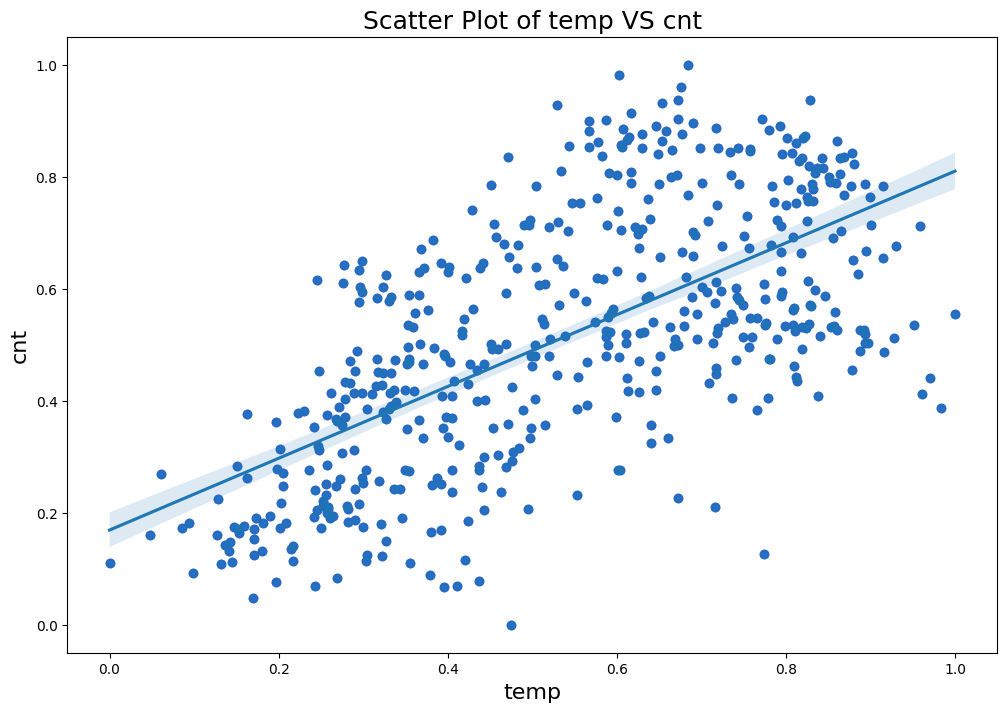

In [50]:
# Visualizing the correlation between 'temp' and 'cnt' with a scatter plot:
plt.figure(figsize=(12, 8),dpi=100)
plt.scatter(df_train['temp'], df_train['cnt'], color='blue', alpha=0.7)
sns.regplot(data=df_train,y="cnt",x="temp")

# Adding labels and title:
plt.xlabel('temp', fontsize=16)
plt.ylabel('cnt', fontsize=16)
plt.title('Scatter Plot of temp VS cnt', fontsize=18)

# Displaying the plot:
plt.show()


#### Observations: It can be seen that there is a positive correlation between 'temp' and 'cnt'.

### Building a linear model:

In [51]:
# Separate the target variable (y) from the features (X) in the training data:
y_train = df_train.pop('cnt')
X_train = df_train

In [52]:
# We will employ the LinearRegression function provided by SciKit Learn due to its compatibility with Recursive Feature Elimination (RFE):
# Recursive Feature Elimination:
# To create a Linear Regression model:
lm = LinearRegression()

# Fitting the model to the training data:
lm.fit(X_train, y_train)

# To create a Recursive Feature Elimination (RFE) object with 15 features:
rfe = RFE(lm, n_features_to_select=15)

# Fit the RFE object to the training data to select the top 15 features:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [53]:
# Listing of Variables Selected in Top 15:
# Creating a list of tuples containing variable names, their selection status, and ranking:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('month_aug', False, 8),
 ('month_dec', False, 4),
 ('month_feb', False, 5),
 ('month_jan', False, 2),
 ('month_july', True, 1),
 ('month_june', False, 13),
 ('month_mar', False, 15),
 ('month_may', False, 6),
 ('month_nov', False, 3),
 ('month_oct', False, 12),
 ('month_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 14),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1)]

In [54]:
# Selecting Variables Based on RFE:
# Getting the names of the selected variables based on RFE:
col = X_train.columns[rfe.support_]

# Display the selected variables:
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'month_july', 'month_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_Light_snowrain', 'weathersit_Misty', 'season_spring',
       'season_summer', 'season_winter'],
      dtype='object')


In [55]:
# Checking Rejected Columns Based on RFE:
# Getting the names of the columns that have been rejected by RFE:
X_train.columns[~rfe.support_]

Index(['atemp', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [56]:
# To create a generic function to calculate VIF of variables:
def calVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [57]:
# to create dataframe with RFE selected variables:
X_train_rfe = X_train[col]

In [58]:
# Calling function To calculate VIF:

calVIF(X_train_rfe)

,Features,VIF
2,workingday,50.68
8,weekday_sat,12.20
9,weekday_sun,11.79
12,season_spring,5.02
3,temp,3.62
14,season_winter,3.49
1,holiday,2.91
13,season_summer,2.62
4,humidity,1.91
11,weathersit_Misty,1.57


#### Observations: workingday shows high VIF value.

### Building The 1st Linear Regression Model:

In [59]:
# Adding a constant term to the features:
X_train_lm_1 = sm.add_constant(X_train_rfe)

# Creating and fitting the linear regression model:
lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

# Displaying the summary of the linear regression model:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 08 Dec 2023   Prob (F-statistic):          2.11e-191
Time:                        13:25:21   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [60]:
# Dropping 'workingday' from the features due to high VIF values:
X_train_new = X_train_rfe.drop(['workingday'], axis=1)

# To run the function to calculate VIF for the new model:
calVIF(X_train_new)

,Features,VIF
3,humidity,28.25
2,temp,16.06
4,windspeed,4.68
11,season_spring,4.03
13,season_winter,3.36
12,season_summer,2.79
10,weathersit_Misty,2.30
0,year,2.08
5,month_july,1.59
6,month_sep,1.39


###   Building The 2nd Linear Regression Model:

In [61]:
# Adding a constant term to the features:
X_train_lm_2 = sm.add_constant(X_train_new)

# Creating and fitting the linear regression model:
lr_2 = sm.OLS(y_train, X_train_lm_2).fit()

# Displaying the summary of the 2nd linear regression model:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 08 Dec 2023   Prob (F-statistic):          2.11e-191
Time:                        13:25:21   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [62]:
# Dropping 'weekday_sat' variable due to high p-value:
X_train_new = X_train_new.drop(['weekday_sat'], axis=1)
# To run the function to calculate VIF for the new model:
calVIF(X_train_new)

,Features,VIF
3,humidity,28.24
2,temp,16.04
4,windspeed,4.66
10,season_spring,4.01
12,season_winter,3.34
11,season_summer,2.79
9,weathersit_Misty,2.30
0,year,2.08
5,month_july,1.59
6,month_sep,1.39


### Building The 3rd Linear Regression Model:

In [63]:
# Adding a constant term to the features:
X_train_lm_3 = sm.add_constant(X_train_new)

# Creating and fitting the linear regression model:
lr_3 = sm.OLS(y_train, X_train_lm_3).fit()

# Displaying the summary of the 3rd linear regression model:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.8
Date:                Fri, 08 Dec 2023   Prob (F-statistic):          2.12e-192
Time:                        13:25:21   Log-Likelihood:                 517.20
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -947.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [64]:
# Dropping 'humidity' from the features due to high VIF values:
X_train_new = X_train_new.drop(['humidity'], axis=1)
# Running the function to calculate VIF for the new model:
calVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
10,season_summer,2.24
9,season_spring,2.11
0,year,2.07
11,season_winter,1.81
4,month_july,1.59
8,weathersit_Misty,1.56
5,month_sep,1.34
6,weekday_sun,1.18


### Building The 4th Linear Regression Model:

In [65]:
# Adding a constant term to the features:
X_train_lm_4 = sm.add_constant(X_train_new)

# Creating and fitting the linear regression model:
lr_4 = sm.OLS(y_train, X_train_lm_4).fit()

# Displaying the summary of the 4th linear regression model:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Fri, 08 Dec 2023   Prob (F-statistic):          1.45e-189
Time:                        13:25:21   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [66]:
# We can drop month_july variable as it has high p-value:
X_train_new = X_train_new.drop(['month_july'], axis = 1)

# Running the function to calculate VIF for the new model:
calVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,year,2.07
8,season_spring,2.02
9,season_summer,1.91
10,season_winter,1.66
7,weathersit_Misty,1.55
4,month_sep,1.23
5,weekday_sun,1.18
6,weathersit_Light_snowrain,1.08


#### Observations: The VIF value appears satisfactory now, having fallen below 5.

### Building The 5th Linear Regression Model:

In [67]:
# Adding a constant term to the features
X_train_lm_5 = sm.add_constant(X_train_new)

# Creating and fitting the linear regression model
lr_5 = sm.OLS(y_train, X_train_lm_5).fit()

# Displaying the summary of the 5th linear regression model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Fri, 08 Dec 2023   Prob (F-statistic):          3.23e-189
Time:                        13:25:21   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Observations: 
- #### Model 5th, lr_5, demonstrates minimal multicollinearity among predictors, and all the predictors have statistically significant p-values.
- #### F-Statistics value of 235.2 (which is greater than 1) and the p-value is almost equals to zero, indicate the significance of the overall model.

In [68]:
# Checking the parameters and their coefficient values for the 5th linear regression model:
parameter_values = lr_5.params
print(parameter_values)

const                        0.198086
year                         0.234000
holiday                     -0.104300
temp                         0.478161
windspeed                   -0.148022
month_sep                    0.089359
weekday_sun                 -0.049479
weathersit_Light_snowrain   -0.290403
weathersit_Misty            -0.080899
season_spring               -0.054372
season_summer                0.062284
season_winter                0.096907
dtype: float64


### Analyzing The Residuals of The Train Data and Validation:

In [69]:
X_train_lm_5

,const,year,holiday,temp,windspeed,month_sep,weekday_sun,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,1,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,0,1,0,1,0


In [70]:
y_train_pred = lr_5.predict(X_train_lm_5)

### To Check Distribution of Error Terms:

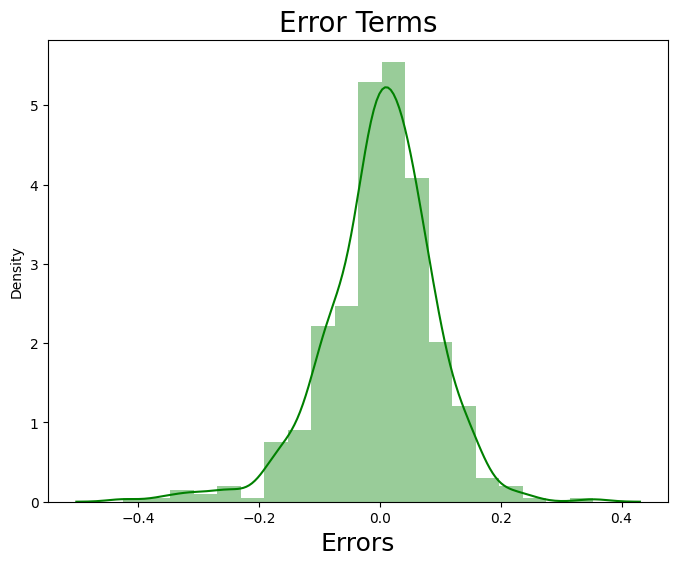

In [71]:
# Plotting the histogram of the error terms:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot((y_train - y_train_pred), bins=20, ax=ax, color='green')
ax.set_title('Error Terms', fontsize=12)
ax.set_xlabel('Errors', fontsize=12)
plt.show()

#### Observations: The histogram above indicates that the residuals are distributed normally. Therefore, we can conclude that our assumption for Linear Regression is valid.

### To Check Multicollinearity:

In [72]:
# Running the function to calculate VIF for the new model:
calVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,year,2.07
8,season_spring,2.02
9,season_summer,1.91
10,season_winter,1.66
7,weathersit_Misty,1.55
4,month_sep,1.23
5,weekday_sun,1.18
6,weathersit_Light_snowrain,1.08


#### Observations: As per the VIF values, there is no evidence of multicollinearity among the predictor variables.

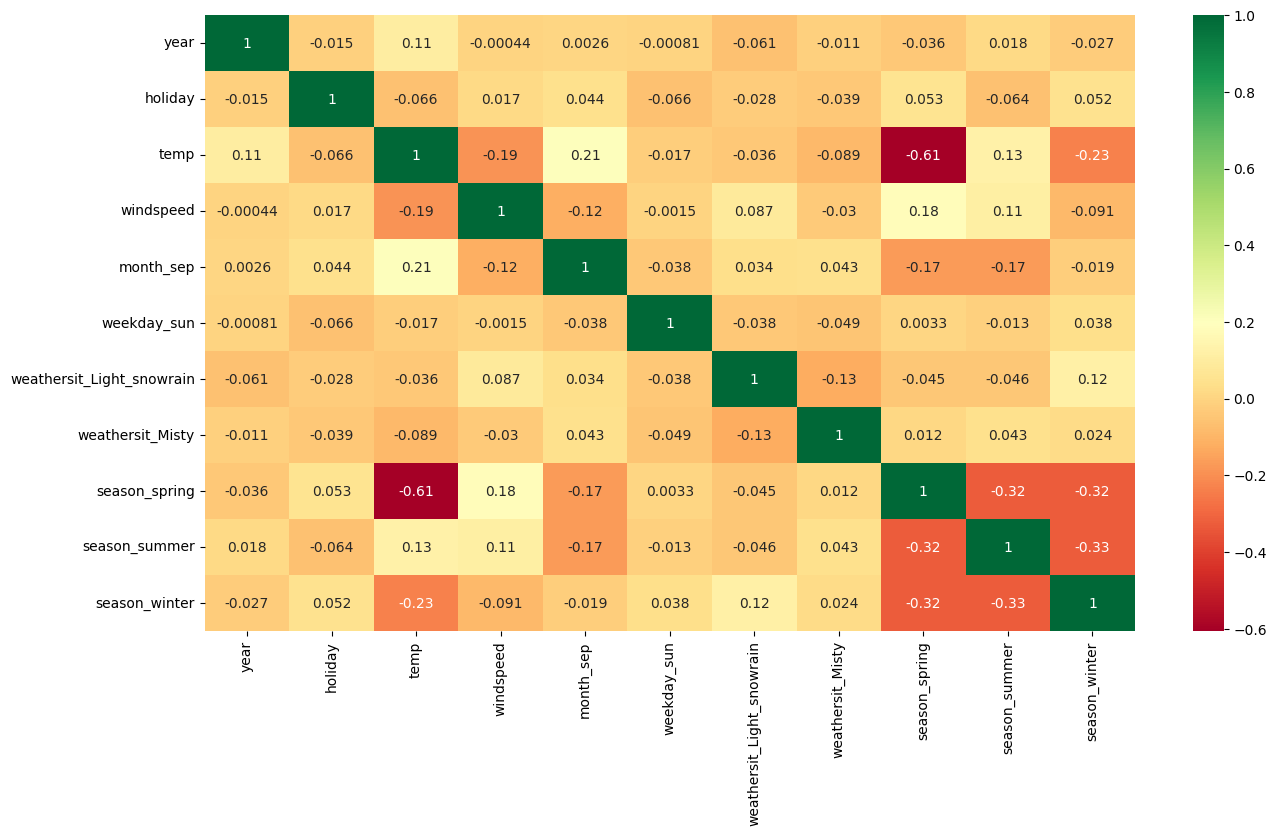

In [73]:
# Plotting a heatmap of the correlation matrix for the features
plt.figure(figsize=(15, 8))
sns.heatmap(X_train_new.corr(), annot=True, cmap="RdYlGn")
plt.show()

#### Observations: The heatmap also confirms the absence of multicollinearity among the variables.

### To Check Linearity:

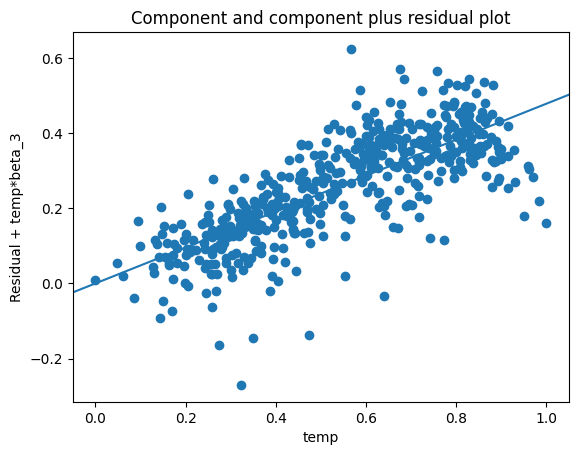

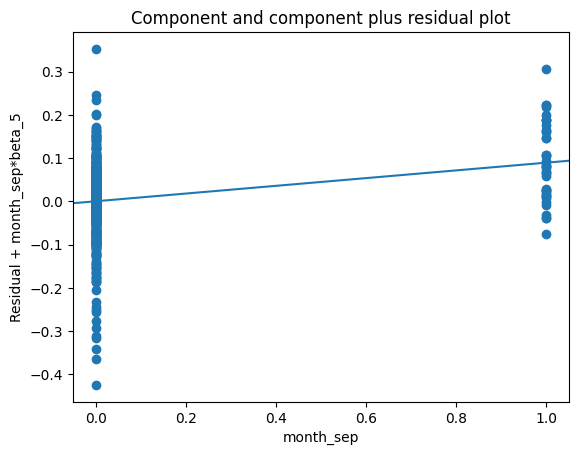

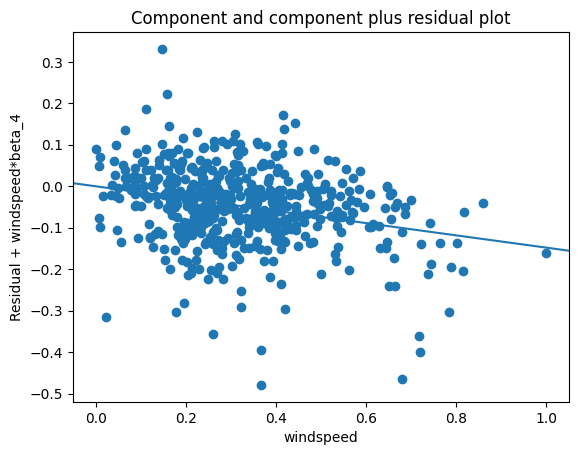

In [74]:
# Linear relationship validation using CCPR plot for 'temp':
sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

# Linear relationship validation using CCPR plot for 'sep':
sm.graphics.plot_ccpr(lr_5, 'month_sep')
plt.show()

# Linear relationship validation using CCPR plot for 'windspeed':
sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

#### Observations: The visualizations above reveal a clear indication of linearity.

### To Check Homoscedasticity:

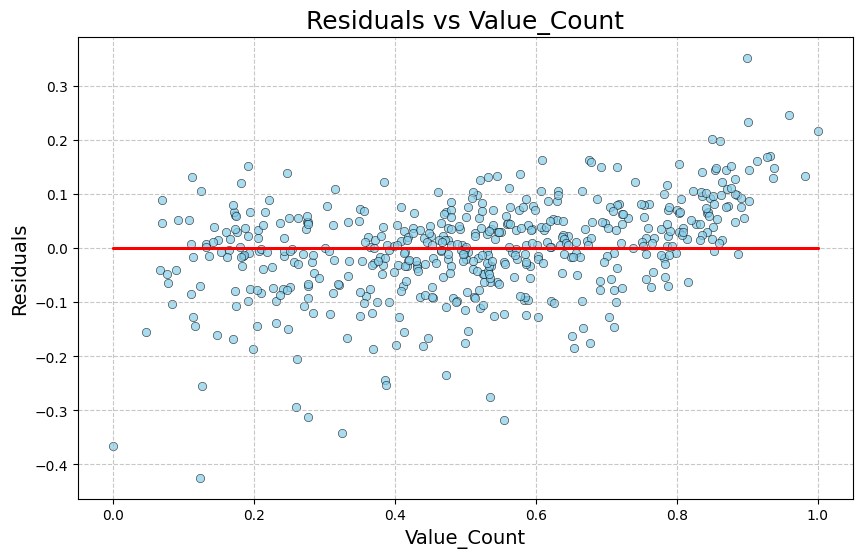

In [75]:
# To calculate residuals and plot a scatter plot:
y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred

# Plotting a scatter plot of residuals against predicted values:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=residual, alpha=0.7, edgecolor='k', color='skyblue')
plt.plot(y_train, (y_train - y_train), '-r', linewidth=2)  # Adding a reference line at y=0

plt.title('Residuals vs Value_Count', fontsize=18)
plt.xlabel('Value_Count', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Observations: The plot of residuals above does not show any visible pattern.

### To Check Independence of Residuals:

In [76]:
from statsmodels.stats.stattools import durbin_watson
#perform Durbin-Watson test:
durbin_watson(lr_5.resid)

2.101577990917472

#### Observations: A Durbin-Watson value for the final model, lr_5, indicates there is no autocorrelation.

#### Making Predictions Utilizing the final model:
- #### Now that the model has been fitted, and the normality of error terms has been verified, it's time to proceed with making predictions using the final model, i.e., the 5th model.

In [77]:
# Scaling on the test dataset:
# Listing of numeric variables to scale:
n_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

# Applying scaling on the test dataset:
df_test[n_vars] = scaler.transform(df_test[n_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [78]:
# Displaying descriptive statistics of the test dataset:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
# Separating the target variable 'cnt' from the features in the test dataset:
y_test = df_test.pop('cnt')
X_test = df_test

In [80]:
# Selecting the same columns in the test dataset as used in the 5th linear regression model:
col1 = X_train_new.columns
X_test = X_test[col1]

# Adding a constant variable to the test dataframe:
X_test_lm_5 = sm.add_constant(X_test)

In [81]:
# Predicting values on the test dataset using the 5th linear regression model:
y_pred = lr_5.predict(X_test_lm_5)

In [82]:
# Calculating R-squared score on the test dataset:
r2 = r2_score(y_test, y_pred)
rounded_r2 = round(r2, 4)

# Displaying the rounded R-squared score:
print("R-squared score on the test dataset:", rounded_r2)

R-squared score on the test dataset: 0.8066


### Model Evaluation:

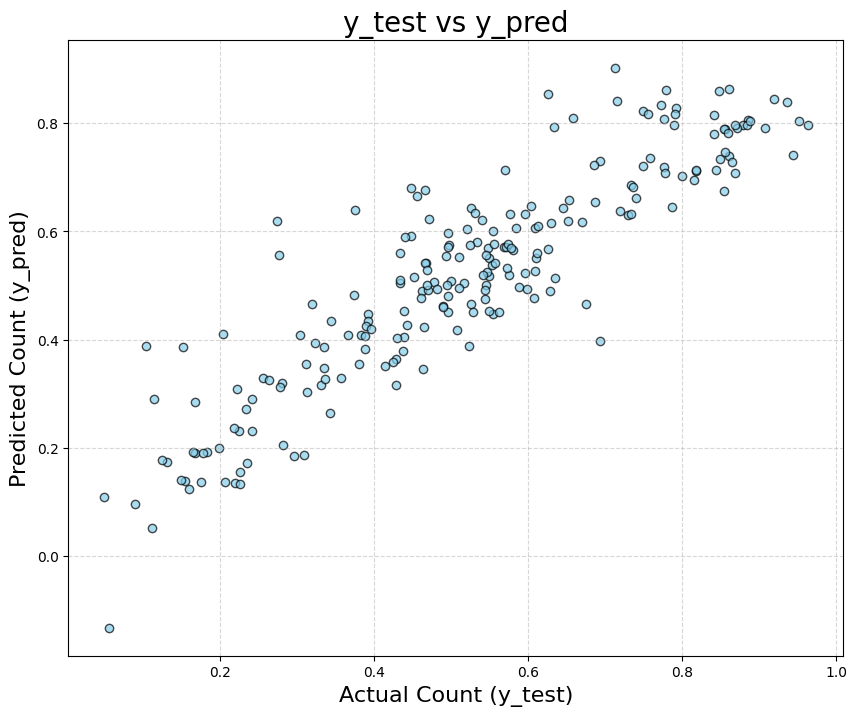

In [83]:
# Plotting y_test against y_pred to understand the spread:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('Actual Count (y_test)', fontsize=16)
plt.ylabel('Predicted Count (y_pred)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [84]:
# Rounding the coefficient values of the linear regression model:
rounded_coefficients = round(lr_5.params, 4)

# Displaying the rounded coefficients:
print(rounded_coefficients)

const                        0.1981
year                         0.2340
holiday                     -0.1043
temp                         0.4782
windspeed                   -0.1480
month_sep                    0.0894
weekday_sun                 -0.0495
weathersit_Light_snowrain   -0.2904
weathersit_Misty            -0.0809
season_spring               -0.0544
season_summer                0.0623
season_winter                0.0969
dtype: float64


#### We can see that the equation of our best fitted line is:

$ cnt = 0.1981 + 0.2340  \times  year - 0.1043  \times  holiday + 0.4782 \times temp - 0.1480 \times windspeed + 0.0894 \times month_sep  -0.0495 \times weekday_sun - 0.2904 \times weathersit_Light_snowrain - 0.0809 \times Misty - 0.0544 \times season_spring + 0.0623 \times season_summer + 0.0969 \times season_winter $

In [85]:
# Calculating Adjusted R-squared value for the test dataset:
adjusted_r2 = round(1 - (1 - r2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1), 4)

# Displaying the adjusted R-squared value:
print("Adjusted R-squared on the test dataset:", adjusted_r2)

Adjusted R-squared on the test dataset: 0.7963


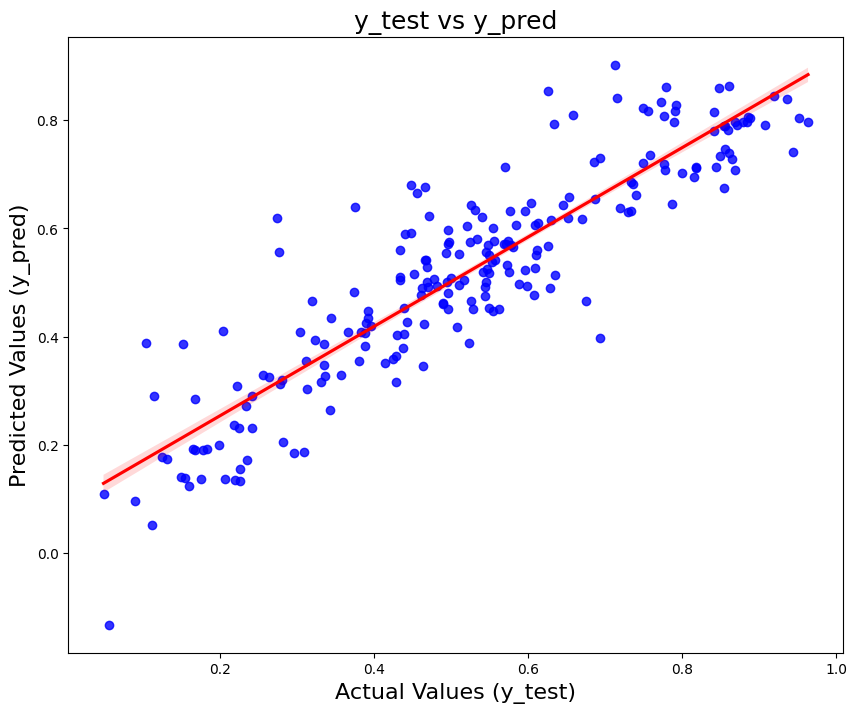

In [86]:
# Convert to float if not already:
y_test = y_test.astype(float)  
y_pred = y_pred.astype(float)

# Remove NaN values if present
y_test = y_test.dropna()
y_pred = y_pred.dropna()

# Visualizing the fit on the test data
# Plotting a Regression plot

# Create a figure
plt.figure(figsize=(10, 8))

# Plot a regression plot
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Set plot title and labels
plt.title('y_test vs y_pred', fontsize=14)
plt.xlabel('Actual Values (y_test)', fontsize=12)
plt.ylabel('Predicted Values (y_pred)', fontsize=12)

# Show the plot
plt.show()

### Comparision Between Training and Testing Dataset:
- Train dataset R^2          : 0.839
- Test dataset R^2           : 0.806
- Train dataset Adjusted R^2 : 0.835  
- Test dataset Adjusted R^2  : 0.790
#### Observations: It seems that this model is well-suited for generalization.

### Key Findings:
<div align="justify">In conclusion, the analysis has identified key variables that significantly impact the demand for shared bikes. These include:<br> 

- year<br>
- holiday<br>
- temp<br>
- windspeed<br>
- sep<br>
- Light_snowrain<br>	
- Misty<br>
- spring<br>
- summer <br>
- winter</div>

### Recommendations:  
<div align="justify">After examining the model, it is advisable for the company to focus on the following key factors:<br>

- Concentrate on extending business operations in September.<br>
- With an increase in temperature, the demand also increases, so it is crucial to monitor and record changes in weather conditions.<br>
- During the winter season the demand increases, so the company should be well prepared to meet the high demand.</div>

### Technologies Used:
- Python, version 3 
- NumPy for numerical computations
- Matplotlib and Seaborn for data visualization
- Pandas for data manipulation
- Seaborn for statistical data visualization
- Statsmodels for statistical modeling
- Sklearn for machine learning tasks
- Jupyter Notebook for interactive analysis

### Acknowledgements:
- I acknowledge and appreciate the valuable course materials from upGrad and IIIT-B which enhanced my understanding of data analysis and machine learning

### References:
- Python documentations
- Exploratory Data Analysis
- Stack Overflow


### Contact:
Created by: https://github.com/Erkhanal - feel free to contact!
#### *Msc, ML&AI*